## California Housing Price Prediction
DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.

2. Handle missing values :
Fill the missing values with the mean of the respective column.

3. Encode categorical data :
Convert categorical column in the dataset to numerical data.

4. Split the dataset : 
Split the data into 80% training dataset and 20% test dataset.

5. Standardize data :
Standardize training and test datasets.

6. Perform Linear Regression : 
Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Perform Decision Tree Regression :
Perform Decision Tree Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error from Decision Tree Regression.

8. Perform Random Forest Regression :
Perform Random Forest Regression on training data.
Predict output for test dataset using the fitted model.
Print RMSE (root mean squared error) from Random Forest Regression.

9. Bonus exercise: Perform Linear Regression with one independent variable :
Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### 1. Load the data :


In [3]:
df = pd.read_excel('Housing.xlsx')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2. Handle missing values :
Fill the missing values with the mean of the respective column.

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
df['total_bedrooms'].median()

435.0

In [9]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [11]:
##data[data.duplicated() == 1]

df[df.duplicated() == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


### 3. Encode categorical data :
Convert categorical column in the dataset to numerical data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Method 1: LabelEncoding 

In [13]:
len(df['ocean_proximity'].unique())

5

In [14]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

**Convert the dataframe into an array and perform the labelencoding**

In [15]:
x = df.values
x

array([[-122.23, 37.88, 41, ..., 8.3252, 'NEAR BAY', 452600],
       [-122.22, 37.86, 21, ..., 8.3014, 'NEAR BAY', 358500],
       [-122.24, 37.85, 52, ..., 7.2574, 'NEAR BAY', 352100],
       ...,
       [-121.22, 39.43, 17, ..., 1.7, 'INLAND', 92300],
       [-121.32, 39.43, 18, ..., 1.8672, 'INLAND', 84700],
       [-121.24, 39.37, 16, ..., 2.3886, 'INLAND', 89400]], dtype=object)

In [16]:
x[:,8]

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

In [17]:
set(x[:,8])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [18]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'])
x[:,8] = enc.transform(x[:,8]) 

In [19]:
x[:,8]

array([3, 3, 3, ..., 1, 1, 1], dtype=object)

In [20]:
x

array([[-122.23, 37.88, 41, ..., 8.3252, 3, 452600],
       [-122.22, 37.86, 21, ..., 8.3014, 3, 358500],
       [-122.24, 37.85, 52, ..., 7.2574, 3, 352100],
       ...,
       [-121.22, 39.43, 17, ..., 1.7, 1, 92300],
       [-121.32, 39.43, 18, ..., 1.8672, 1, 84700],
       [-121.24, 39.37, 16, ..., 2.3886, 1, 89400]], dtype=object)

Here the encoding is done

### Method 2: OneHotEncoding 

In [21]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
pd.get_dummies(df['ocean_proximity']).drop(['<1H OCEAN'],axis=1)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,1,0,0,0
20636,1,0,0,0
20637,1,0,0,0
20638,1,0,0,0


In [25]:
final_data = pd.concat([df, pd.get_dummies(df['ocean_proximity'])],axis=1)

In [26]:
final_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,0,1,0,0,0


In [27]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
 10  <1H OCEAN           20640 non-null  uint8  
 11  INLAND              20640 non-null  uint8  
 12  ISLAND              20640 non-null  uint8  
 13  NEAR BAY            20640 non-null  uint8  
 14  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(4), int64(5), object(1), uint8(5)
memory u

Since we encoded object type datatype we can remove the ocean_proximity

In [28]:
final_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [29]:
final_data.drop(['ocean_proximity'],axis=1,inplace=True)

In [30]:
final_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


**Extract input (X) and output (Y) data from the dataset.**


In [31]:
X = final_data.drop(['median_house_value'],axis=1)

In [32]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0


In [33]:
y = final_data['median_house_value'].values.reshape(-1,1)

In [34]:
y[:3]

array([[452600],
       [358500],
       [352100]], dtype=int64)

### Methods

fit(X[, y, sample_weight]): Compute the mean and std to be used for later scaling.

transform(X[, copy]): Perform standardization by centering and scaling.

fit_transform(X[, y]): Fit to data, then transform it.

get_feature_names_out([input_features]): Get output feature names for transformation.

get_params([deep]): Get parameters for this estimator.

inverse_transform(X[, copy]): Scale back the data to the original representation.

partial_fit(X[, y, sample_weight]): Online computation of mean and std on X for later scaling.

set_params(**params): Set the parameters of this estimator.

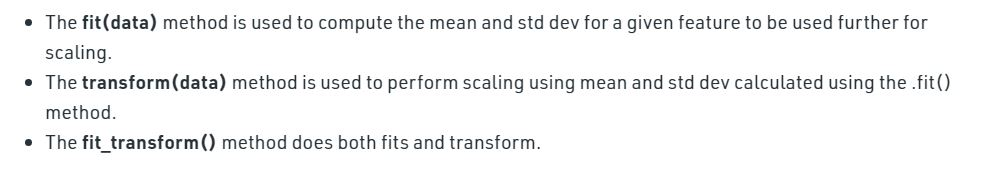

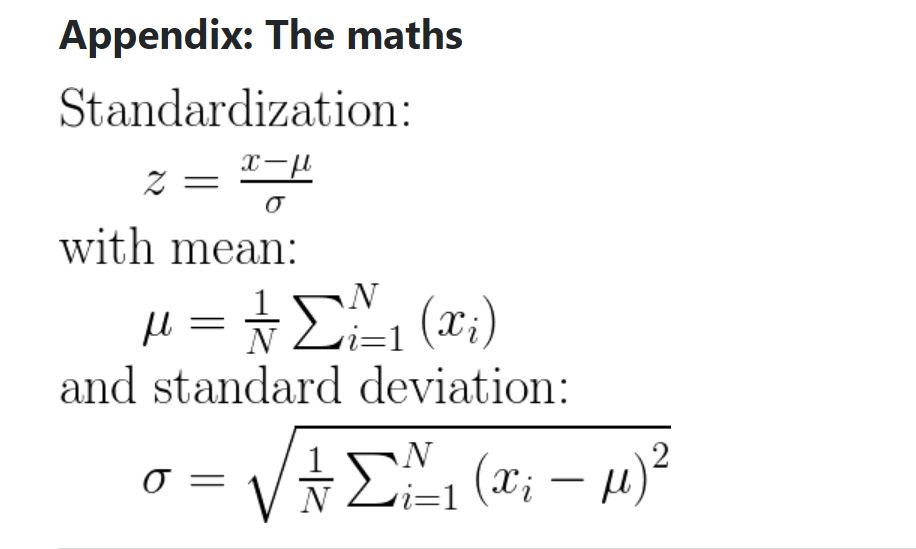

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
y_s = scaler.fit_transform(y)

In [36]:
X_s

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

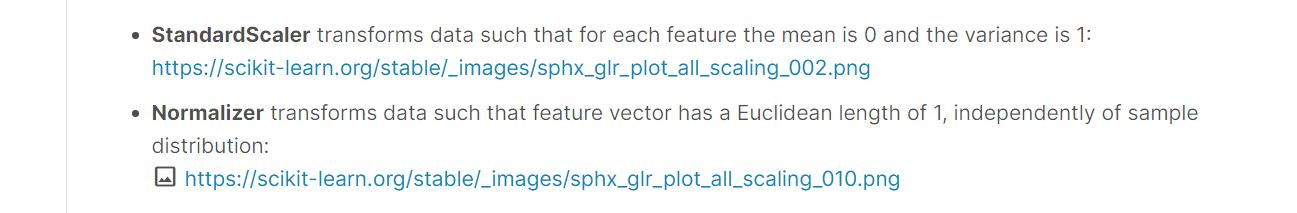

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X_s, y_s, test_size=0.20, random_state=25)

**Perform LinearRegression**

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
# The coefficients
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[-4.56132848e-01 -4.62662415e-01  1.14863773e-01 -9.40035662e-02
   2.52658568e-01 -3.70418102e-01  2.57348139e-01  6.35470515e-01
  -6.37299725e+11 -5.97221087e+11 -1.99677205e+10 -4.02973999e+11
  -4.29771621e+11]]
Intercept:  [-0.00151895]


### Prediction

In [40]:
y_pred = lr.predict(X_test)

### Evaluation

In [41]:
## MSE
mean_squared_error(y_test, y_pred)

0.34252898078348165

In [42]:
r2_score(y_test, y_pred)

0.6475108999123623

### Accuracy is ~65%

In [43]:
y_pred

array([[-0.8167045 ],
       [ 0.11185385],
       [ 0.26639487],
       ...,
       [ 0.506202  ],
       [ 2.07074667],
       [ 0.82733847]])

#### flatten() function we can flatten a matrix to one dimension in python

In [44]:
y_pred.flatten()

array([-0.8167045 ,  0.11185385,  0.26639487, ...,  0.506202  ,
        2.07074667,  0.82733847])

In [45]:
y_test.flatten()

array([-1.20766454,  2.20329291,  0.68586748, ...,  0.56627599,
        2.54041094,  0.83232373])

### Create a visualization to show how actual and predicted data behaved

In [46]:
test = pd.DataFrame({'Predicted':y_pred.flatten(),'Actual':y_test.flatten()})
test.head()

,Predicted,Actual
0,-0.816704,-1.207665
1,0.111854,2.203293
2,0.266395,0.685867
3,0.808631,-0.043814
4,-0.119622,-0.480583


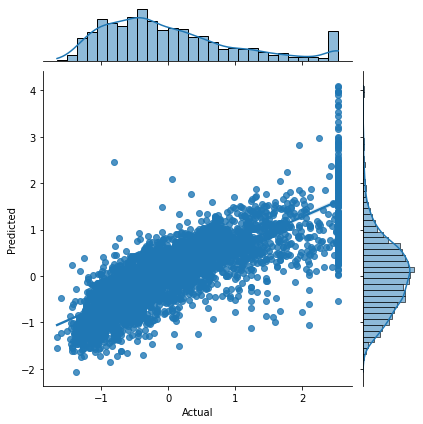

In [47]:
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

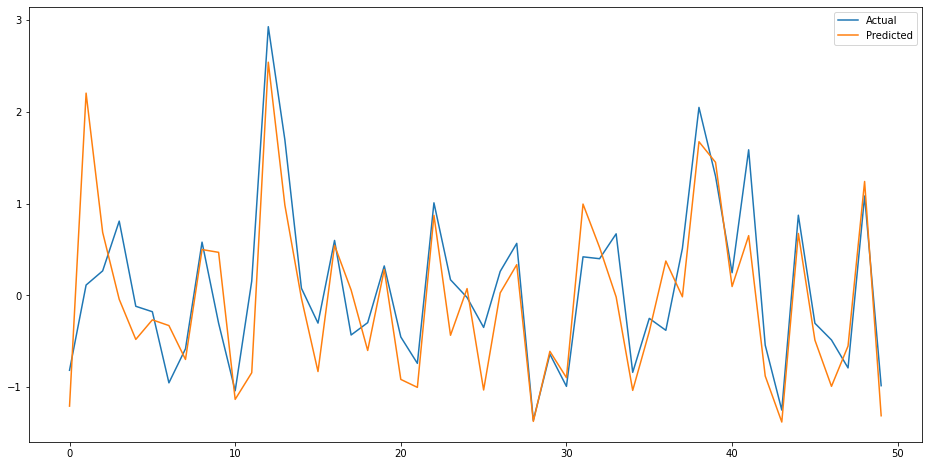

In [48]:
fig= plt.figure(figsize=(16,8))
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

### MinMaxScaler

In [49]:
min_scalar = MinMaxScaler()
X_m = min_scalar.fit_transform(X)
y_m = min_scalar.fit_transform(y)

In [50]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split( X_m, y_m, test_size=0.20, random_state=111)

In [51]:
lr_m = LinearRegression()
lr_m.fit(X_train_m,y_train_m)

LinearRegression()

In [52]:
y_pred_m = lr_m.predict(X_test_m)

In [53]:
mean_squared_error(y_test_m, y_pred_m)

0.020381419550364103

In [54]:
r2_score(y_test_m, y_pred_m)

0.6418081110197333

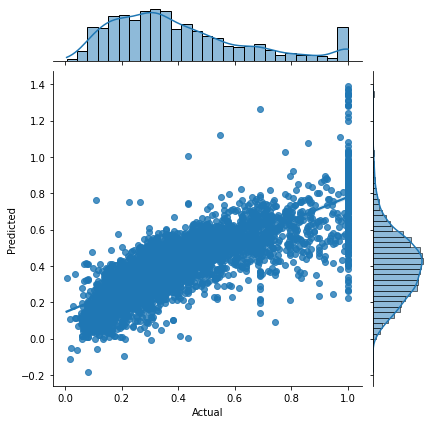

In [55]:
test = pd.DataFrame({'Predicted':y_pred_m.flatten(),'Actual':y_test_m.flatten()})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)

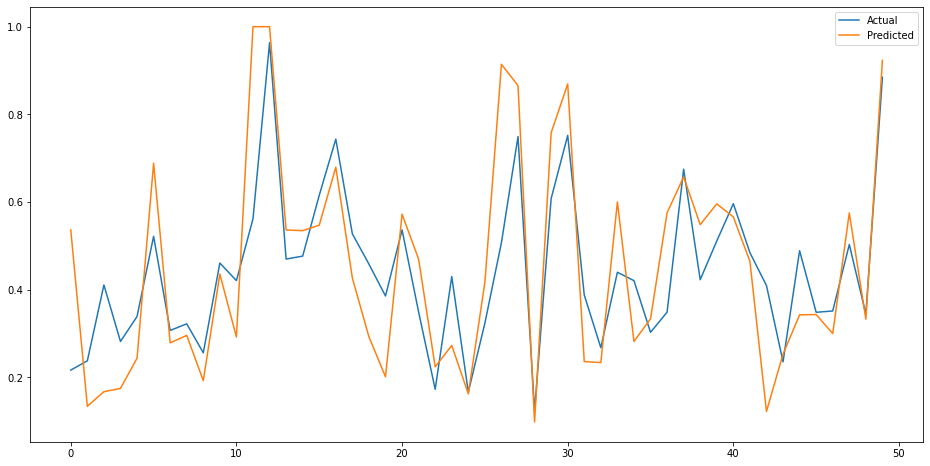

In [56]:
fig= plt.figure(figsize=(16,8))
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

### Decision Tree Modeling
We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [60]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [61]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [62]:
predTree = drugTree.predict(X_testset)

In [63]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(predTree,y_testset))

DecisionTrees's Accuracy:  0.046027131782945735


In [64]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

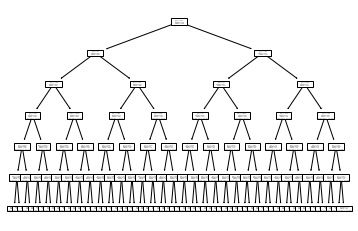

In [65]:
tree.plot_tree(drugTree)
plt.show()

### Perform Linear Regression with one independent variable

Extract just the median_income column from the independent variables (from X_train and X_test).

In [69]:
X_mi = final_data['median_income'].values.reshape(-1,1)
y_mi = final_data['median_house_value'].values.reshape(-1,1)

In [70]:
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split( X_mi, y_mi, test_size=0.20, random_state=111)


In [71]:
lr_mi = LinearRegression()
lr_mi.fit(X_train_mi,y_train_mi)

LinearRegression()

In [73]:
y_pred_mi = lr_mi.predict(X_test_mi)
y_pred_mi 

array([[106644.32541272],
       [130751.67842259],
       [194741.16108085],
       ...,
       [245857.9892138 ],
       [261162.37847651],
       [359040.75162895]])

In [74]:
mean_squared_error(y_test_mi,y_pred_mi)

7282634839.897113

In [75]:
r2_score(y_test_mi,y_pred_mi)

0.45589490363154994

In [78]:
test2 = pd.DataFrame({'Predicted2':y_pred_mi.flatten(),'Actual2':y_test_mi.flatten()})

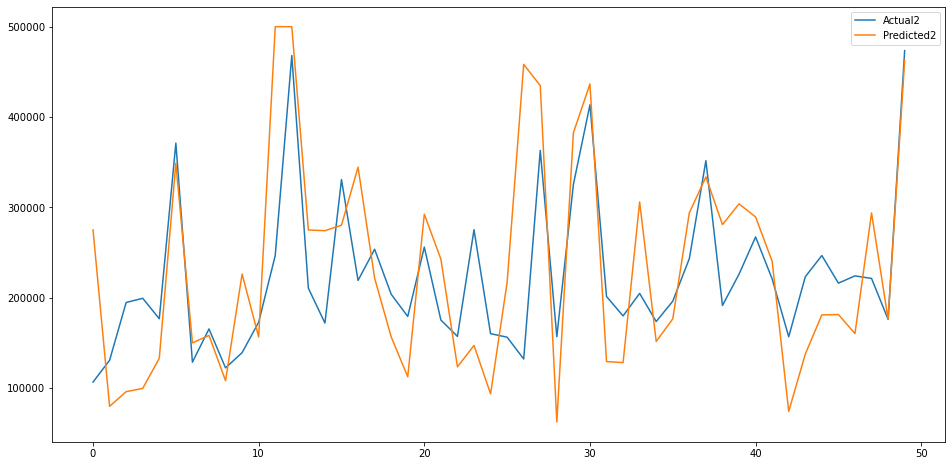

In [79]:
fig= plt.figure(figsize=(16,8))
plt.plot(test2[:50])
plt.legend(['Actual2','Predicted2'])